In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

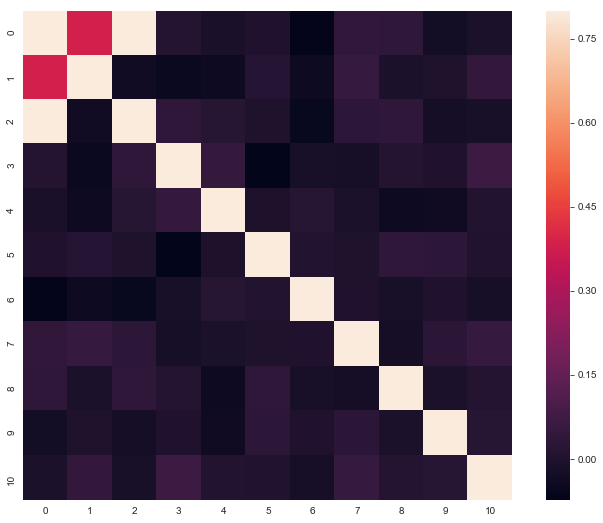

In [45]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.843248554362
R-squared PLSR: 0.843248370448


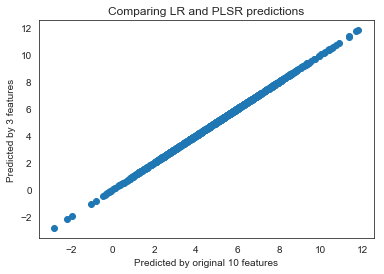

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Use the cell below to create new partial least square regressions with different numbers of components, then see how those changes affect the ability of your models to reproduce the predicted Y values as well as the regular linear regression.  Typically, you would choose your components based on the number that gives the most consistent performance between training and test datasets.

Since this data is randomly generated, you can also play with it by changing how $y$ is computed, then observing how different relationships between $y$ and $X$ play out in PLSR.

In [44]:
# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] * 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

9

R-squared regression: 0.833563243659
0 dimension R-squared PLSR: 0.825700003926
1 dimension R-squared PLSR: 0.833541134112
2 dimension R-squared PLSR: 0.833563180836
3 dimension R-squared PLSR: 0.833563243084
4 dimension R-squared PLSR: 0.833563243659
5 dimension R-squared PLSR: 0.833563243659
6 dimension R-squared PLSR: 0.833563243659
7 dimension R-squared PLSR: 0.833563243659
8 dimension R-squared PLSR: 0.833563243659
9 dimension R-squared PLSR: 0.833563243659


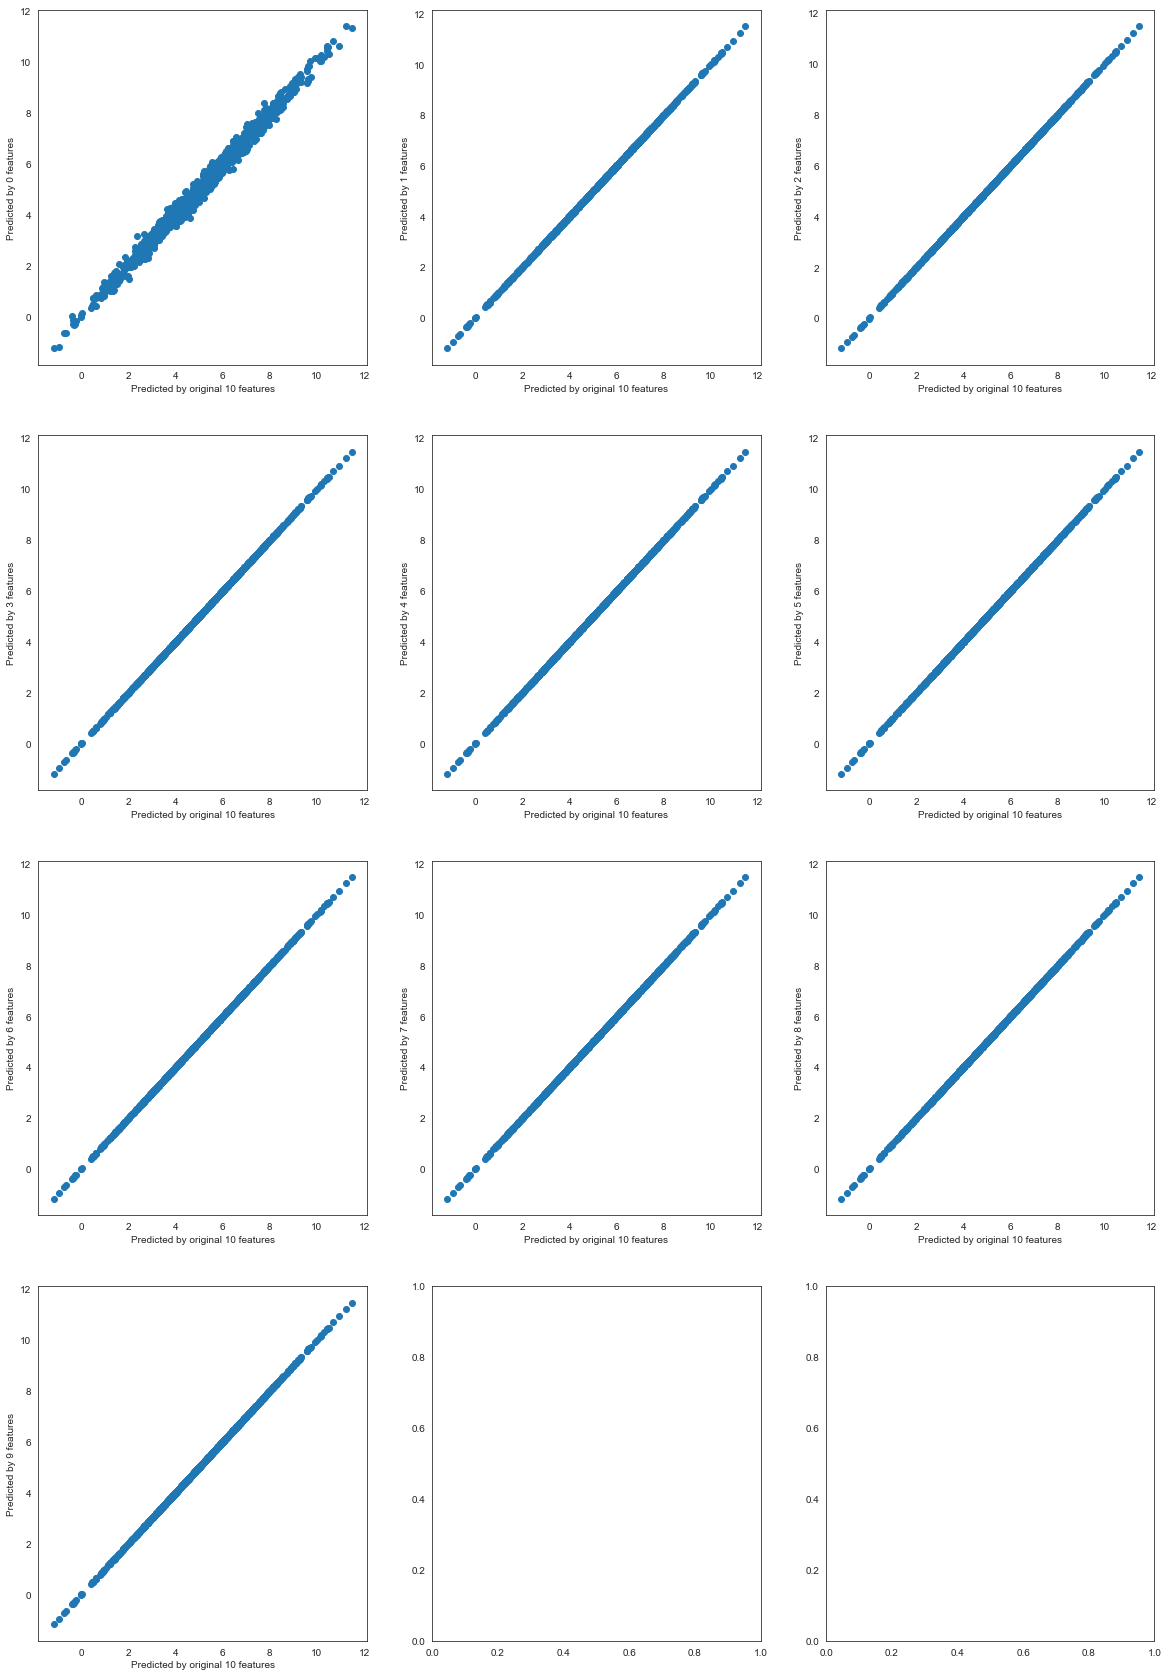

In [47]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


fig, axes = plt.subplots(4,3, figsize = (20,30))
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.

for i in range(10):
    pls1 = PLSRegression(n_components=i+1)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('{} dimension R-squared PLSR:'.format(i), pls1.score(X, y))

    # Compare the predictions of the two models
    axes[i//3][i%3].scatter(Y_pred,Y_PLS_pred) 
    axes[i//3][i%3].set(xlabel='Predicted by original 10 features', 
                        ylabel='Predicted by {} features'.format(i),
                       )
    
                        
plt.show()